In [6]:
library(Seurat)
library(dplyr)
library(tximport)
library(ggplot2)
library(ggsci)
library(harmony)
library(RColorBrewer)
library(DoubletFinder)
library(Rmagic)

# data import and clustering

## Alevin data import

In [7]:
files <- file.path('/data/Matthew/scrna/sc_align/cro1_v7_nodecoy_exp10k/alevin/quants_mat.gz')
txi <- tximport(files, type = "alevin")
cro_1 <- CreateSeuratObject(counts = txi$counts, project = "cro1",min.cells = 5)

files <- file.path('/data/Matthew/scrna/sc_align/cro2_v7_nodecoy_exp18k/alevin/quants_mat.gz')
txi <- tximport(files, type = "alevin")
cro_2 <- CreateSeuratObject(counts = txi$counts, project = "cro2",min.cells = 5)

files <- file.path('/data/Matthew/scrna/sc_align/cro3_v7_nodecoy_exp13k/alevin/quants_mat.gz')
txi <- tximport(files, type = "alevin")
cro_3 <- CreateSeuratObject(counts = txi$counts, project = "cro3",min.cells = 5)

reading in alevin gene-level counts across cells with fishpond

reading in alevin gene-level counts across cells with fishpond

reading in alevin gene-level counts across cells with fishpond



In [8]:
cro_1
cro_2
cro_3

An object of class Seurat 
17920 features across 10608 samples within 1 assay 
Active assay: RNA (17920 features, 0 variable features)

An object of class Seurat 
19269 features across 17517 samples within 1 assay 
Active assay: RNA (19269 features, 0 variable features)

An object of class Seurat 
19019 features across 12405 samples within 1 assay 
Active assay: RNA (19019 features, 0 variable features)

In [4]:
seurat_obj <- merge(x = cro_1, y = c(cro_2, cro_3), 
                 add.cell.ids = c("cro1", "cro2", "cro3"), project = "cro")
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
mt_less <- readLines(paste(id_path, 'mt-id-less.txt',sep = '/'))
chl <- readLines(paste(id_path, 'newcp.gene.id',sep = '/'))
s.genes <- readLines(paste(id_path, 'cellcycle.s.id',sep = '/'))
g2m.genes <- readLines(paste(id_path, 'cellcycle.g2m.id',sep = '/'))

seurat_obj[["percent.mt"]] <- PercentageFeatureSet(seurat_obj, features = intersect(mt_less, rownames(seurat_obj)))
seurat_obj[["percent.chl"]] <- PercentageFeatureSet(seurat_obj, features = intersect(chl, rownames(seurat_obj)))

upper_feature <- 6000
lower_feature <- 500
upper_count <- 30000
lower_count <- 500

seurat_obj <- subset(
  seurat_obj,
  subset =
    nFeature_RNA > lower_feature &
    nFeature_RNA < upper_feature &
    nCount_RNA < upper_count &
    nCount_RNA > lower_count &
    percent.mt < 3 &
    percent.chl < 40
)

seurat_obj <- seurat_obj %>%
    NormalizeData() %>%
    FindVariableFeatures() %>%
    ScaleData(verbose = F) %>%
    RunPCA(verbose = F) %>%
    RunUMAP(dims = 1:10, verbose = F) %>%
    identity()

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


# Doublet screening

Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



NULL
[1] "Creating 12394 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


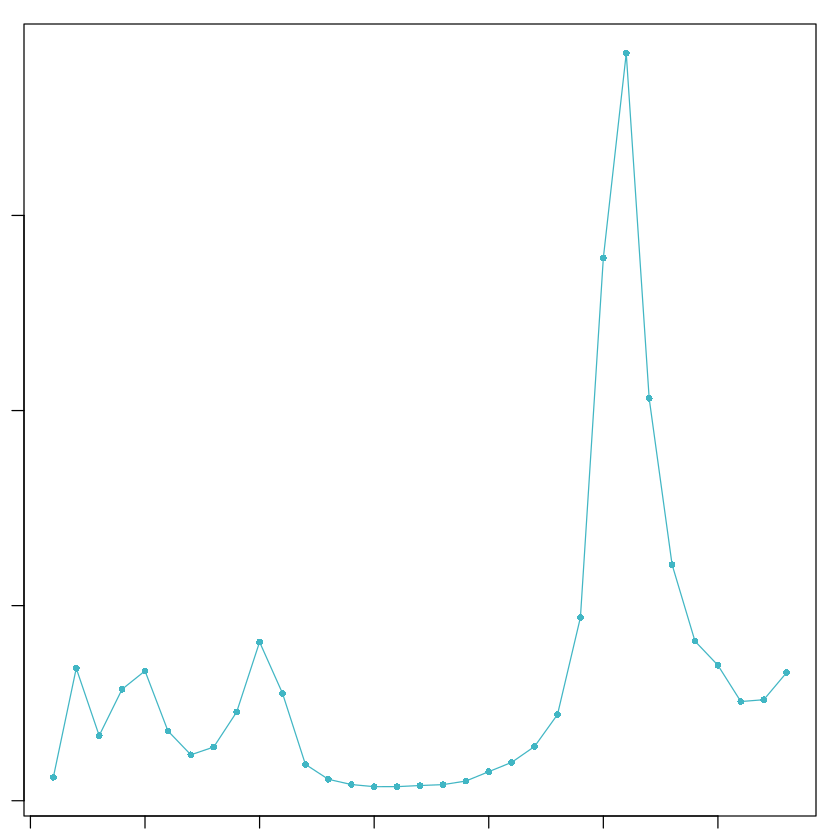

In [5]:
## pK Identification (no ground-truth)
sweep.res.list <- paramSweep_v3(seurat_obj, PCs = 1:10, sct = FALSE)
sweep.stats <- summarizeSweep(sweep.res.list, GT = FALSE)
bcmvn <- find.pK(sweep.stats)
pK_bcmvn <- bcmvn$pK[which.max(bcmvn$BCmetric)] %>%
    as.character() %>%
    as.numeric()

## Homotypic Doublet Proportion Estimate

annotations <- seurat_obj@meta.data$seurat_clusters
homotypic_prop <- modelHomotypic(annotations)

## Assuming 7.5% doublet formation rate - tailor for your dataset
nExp_poi <- round(0.075 * nrow(seurat_obj@meta.data))
nExp_poi.adj <- round(nExp_poi * (1 - homotypic_prop))

## Run DoubletFinder with varying classification stringencies
seurat_obj <- doubletFinder_v3(seurat_obj, PCs = 1:10, pN = 0.25, pK = pK_bcmvn,
                               nExp = nExp_poi, reuse.pANN = FALSE, sct = FALSE)

In [6]:
pK_bcmvn

[1] 0.23

In [7]:
DF_classification <- tail(colnames(seurat_obj@meta.data), 1)

[1] "DF.classifications_0.25_0.23_2789"

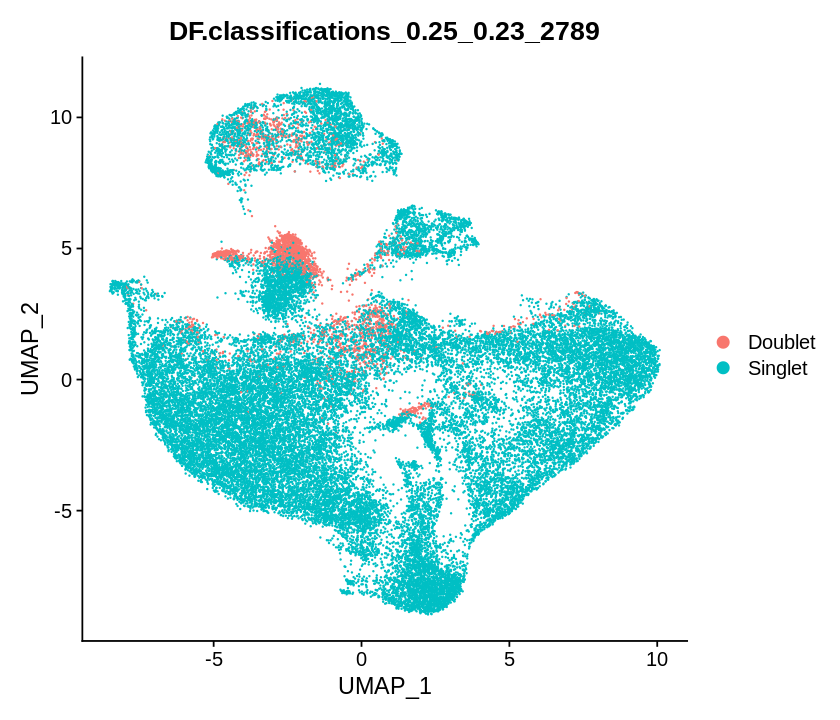

In [8]:
options(repr.plot.height = 6, repr.plot.width = 7)
DimPlot(seurat_obj, reduction = "umap", group.by = DF_classification)
DF_classification

In [9]:
seurat_orig <- seurat_obj
seurat_obj <- subset(seurat_obj, DF.classifications_0.25_0.23_2789 == "Singlet")

In [10]:
# seurat_obj <- seurat_orig

# Standard analysis with Harmony

In [11]:
seurat_obj <-
  CellCycleScoring(
    seurat_obj,
    s.features = s.genes,
    g2m.features = g2m.genes,
    set.ident = TRUE
  )
seurat_obj$CC.Difference <-
  seurat_obj$S.Score - seurat_obj$G2M.Score

seurat_obj <- seurat_obj %>%
    NormalizeData() %>%
    FindVariableFeatures() %>%
    ScaleData(vars.to.regress =
              c("nCount_RNA", "percent.mt", "percent.chl", "CC.Difference"),
              verbose = F) %>%
    RunPCA(verbose = F) %>%
    identity()

In [12]:
seurat_obj <- RunHarmony(seurat_obj, group.by.vars = "orig.ident")

seurat_obj <- seurat_obj %>%
    RunUMAP(reduction = "harmony", dims = 1:50, verbose = F) %>% 
    RunTSNE(reduction = "harmony", dims = 1:50, verbose = F) %>%
    FindNeighbors(reduction = "harmony", dims = 1:50, verbose = F) %>% 
    FindClusters(resolution = 0.5, verbose = F) %>% 
    identity()

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



# loading analyzed data

In [2]:
load(file = '/data/Matthew/scrna/02.Clustering/crov7_alv_mincell5.Rdata')

In [3]:
seurat_obj

An object of class Seurat 
39404 features across 34392 samples within 2 assays 
Active assay: RNA (19702 features, 2000 variable features)
 1 other assay present: MAGIC_RNA
 4 dimensional reductions calculated: pca, umap, harmony, tsne


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
7435 5058 4868 3106 2996 2054 1949 1915 1118 1056  890  806  572  569 

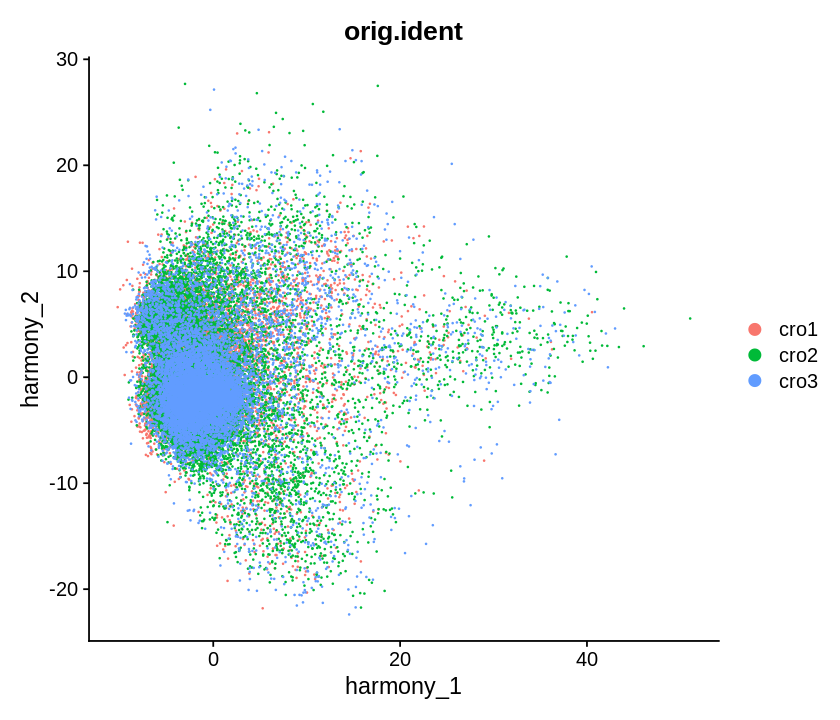

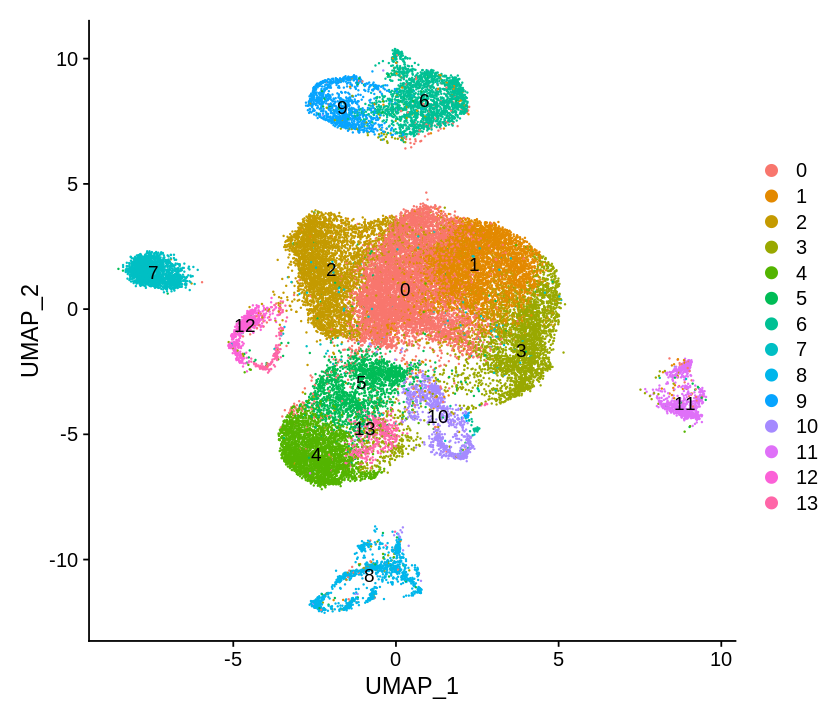

In [14]:
options(repr.plot.height = 6, repr.plot.width = 7)

# Check cell number
table(seurat_obj@active.ident)
DimPlot(object = seurat_obj, reduction = "harmony", pt.size = .1, group.by = "orig.ident")
DimPlot(seurat_obj, reduction = "umap", label = TRUE)

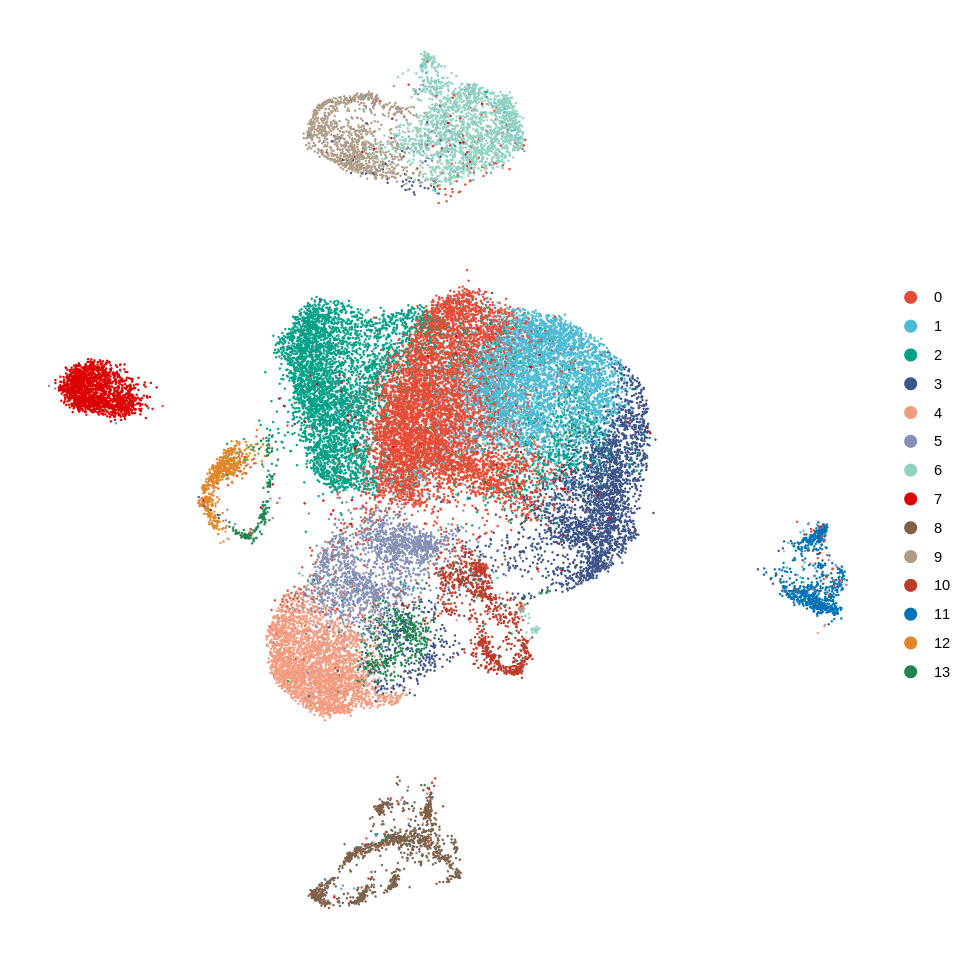

In [35]:
options(repr.plot.height = 8, repr.plot.width = 8)

palath <- pal_npg()(10)
palcro <- pal_nejm()(8)
# seurat_obj <- seurat_obj %>%
#     FindClusters(resolution = 0.5, verbose = F) %>% 
#     identity()
DimPlot(seurat_obj, reduction = "umap", label = F, cols = c(palath, palcro)) + theme_void()

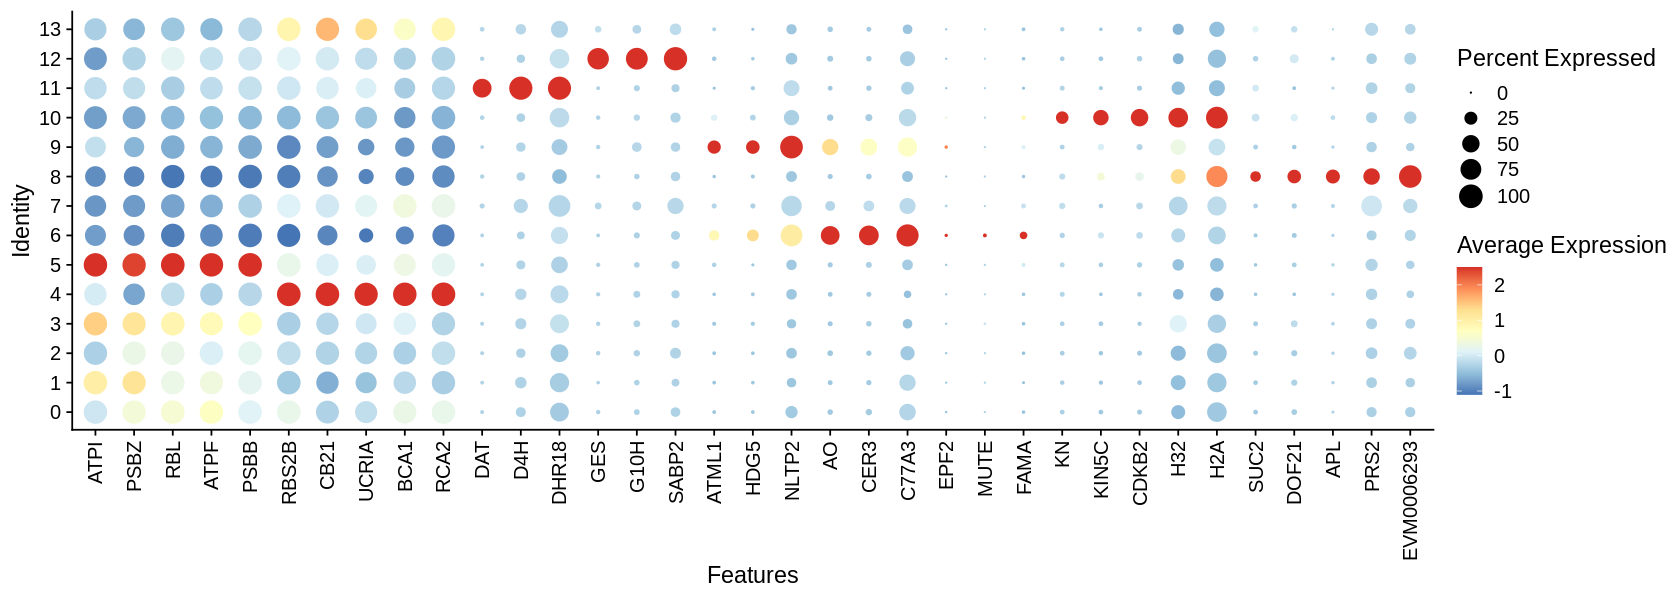

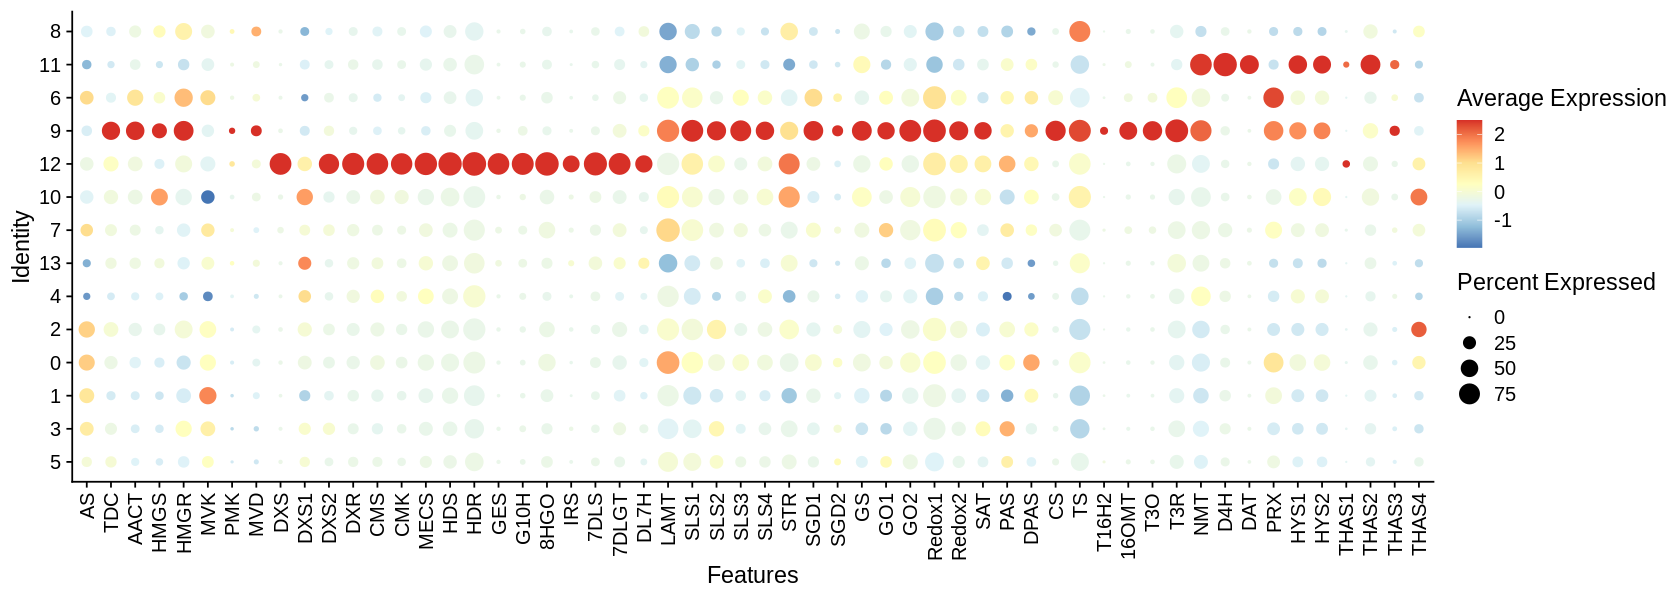

In [5]:
options(repr.plot.height = 5, repr.plot.width = 14)
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
celltype <- readLines(paste(id_path, "celltype.id",sep = "/"))
cellname <- readLines(paste(id_path, "celltype.name",sep = "/"))
pathway_id <- readLines(paste(id_path, "pathway_all_alkaloids.id",sep = "/"))
pathway_name <- readLines(paste(id_path, "pathway_all_alkaloids.name",sep = "/"))

cluster_order <- c("5", "3", "1", "0", "2", "4", "13", "7", "10", "12", "9",
                   "6", "11", "8")

DotPlot(seurat_obj, features = celltype, cols = "RdYlBu", scale.by = "size") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_x_discrete(labels = cellname) #+
#   scale_y_discrete(limits = cluster_order)
ggsave("celltype_num.pdf", height = 5, width = 14)
DotPlot(seurat_obj, features = pathway_id, cols = "RdYlBu", scale.by = "size") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_x_discrete(labels = pathway_name) +
  scale_y_discrete(limits = cluster_order)
# ggsave("pathway.pdf", height = 5, width = 14)


# Imputing data

In [22]:
seurat_obj <- magic(seurat_obj, genes = 'all_genes', seed = 1)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from magic_rna_ to magicrna_”


[1] "Added MAGIC output to MAGIC_RNA. To use it, pass assay='MAGIC_RNA' to downstream methods or set seurat_object@active.assay <- 'MAGIC_RNA'."


In [23]:
save(seurat_obj, file="/data/Matthew/scrna/02.Clustering/crov7_alv_mincell5.Rdata")

In [64]:
# Define cluster names
new.cluster.ids <- c("cro_MC", "cro_MC", "cro_MC", "cro_MC", "cro_MC", 
                     "cro_C5", "cro_EC", "cro_MC", "cro_VC", "cro_C9", 
                     "cro_MC", "cro_IC", "cro_IPAP", "cro_EC")
# Add seurat object levels to new.cluster.ids 
names(new.cluster.ids) <- levels(seurat_obj)
# Rename clusters
seurat_obj <- RenameIdents(seurat_obj, new.cluster.ids)

DimPlot(seurat_obj, reduction = "umap", label = TRUE,
        label.box = T, label.color = "white") +
        theme_void()

[1] "2022-06-15 21:13:20 CST"